In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [42]:
import openpyxl
excel = openpyxl.load_workbook('E:\\Hitsz\\homework\\复杂网络建模\\2022新冠.xlsx')
print(type(excel))

<class 'openpyxl.workbook.workbook.Workbook'>


In [43]:
# 获取所有表的表名
sheets_names = excel.sheetnames
print(sheets_names)     # 结果: ['表1', '表2']
 
# 获取活动表对应的表对象(表对象就是Worksheet类的对象)
sheet = excel['Sheet2']
print(sheet)     # 结果：<Worksheet "表1">

['Sheet1', 'Sheet2']
<Worksheet "Sheet2">


In [44]:
c1 = sheet['C1']      # A1 表示A列中的第一行，这儿的列号采用的是从A开始的
content = c1.value
print(content) 

total Deaths


In [45]:
from openpyxl.utils import get_column_letter, column_index_from_string
max_column = sheet.max_column       # 获取最大列数
column = get_column_letter(max_column)      # 获取最大列数对应的字母列号
# 获取第一行所有单元格对象
row2 = sheet['A1':'%s1' % column]    # ((<Cell '表1'.A1>, <Cell '表1'.B1>, <Cell '表1'.C1>),)
 
for row_cells in row2:
    for cell in row_cells:
        print(cell.coordinate, cell.value)

A1 Country
B1 total Confirmed
C1 total Deaths
D1 total population
E1 Confirmed/100k
F1 Deaths/100k


In [46]:
country = []
data = np.zeros((188, 5))
row_num = 2
while row_num <= sheet.max_row :
    #国家名称导入country中，下标从0开始
    country.append(sheet.cell(row=row_num, column=1).value)
    row_num = row_num + 1
#print(country)
col_num = 2
row_num = 2
while col_num <= sheet.max_column :
    while row_num <= sheet.max_row :
        #将表中第i行的1-100列数据写入data数组中
        #print(sheet.cell(row=row_num, column=col_num).value)
        data[row_num-2][col_num-2]=sheet.cell(row=row_num, column=col_num).value
        row_num = row_num + 1
    col_num = col_num + 1
    row_num =2 
# print(data[:,0])

<IPython.core.display.Javascript object>


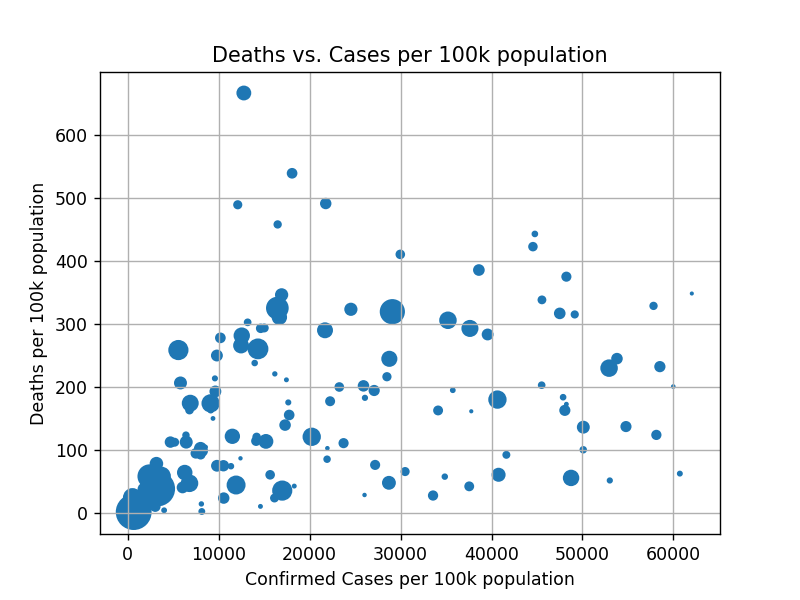

In [47]:
import matplotlib.pyplot as plt
dia = pow(data[:,2],0.5)*0.01
# print(dia)
plt.scatter(data[:,3],data[:,4],dia)
plt.title('Deaths vs. Cases per 100k population')
plt.xlabel('Confirmed Cases per 100k population')
plt.ylabel('Deaths per 100k population')
# plt.legend(loc='best')
plt.grid(True)
plt.show()

In [50]:
excel2 = openpyxl.load_workbook('E:\\Hitsz\\homework\\复杂网络建模\\代表国家新冠.xlsx')
sheets_names = excel2.sheetnames
# print(sheets_names)
sheet_2 = excel2['Sheet1']

In [51]:
country_2 = []
data_2 = np.zeros((sheet_2.max_row, 5))
row_num = 1
while row_num <= sheet_2.max_row :
    #国家名称导入country中，下标从0开始
    country_2.append(sheet_2.cell(row=row_num, column=1).value)
    row_num = row_num + 1
print(country_2)
col_num = 2
row_num = 1
while col_num <= sheet_2.max_column :
    while row_num <= sheet_2.max_row :
        #将表中第i行的1-100列数据写入data数组中
        #print(sheet.cell(row=row_num, column=col_num).value)
        data_2[row_num-1][col_num-2]=sheet_2.cell(row=row_num, column=col_num).value
        row_num = row_num + 1
    col_num = col_num + 1
    row_num =1 

['US', 'India', 'France', 'Brazil', 'Germany', 'Korea, South', 'United Kingdom', 'Italy', 'Japan', 'Russia', 'Turkey', 'Spain', 'Vietnam', 'Australia', 'China', 'Netherlands', 'Greece', 'Thailand', 'Canada', 'Slovakia', 'Sweden', 'Slovenia']


<IPython.core.display.Javascript object>


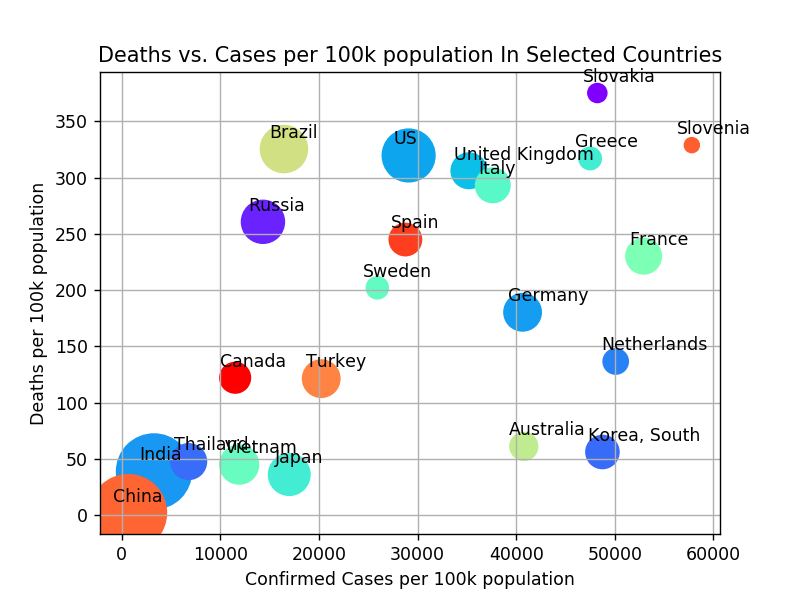

In [52]:
np.random.seed(5646413)

dia_2 = pow(data_2[:,2],0.5)*0.05
# print(dia_2)
# print(data_2[:,3])
N = sheet_2.max_row
colors = np.random.rand(N)
# print(colors)
plt.figure()
plt.scatter(data_2[:,3], data_2[:,4], s=dia_2, c=colors, cmap='rainbow')
# print(data_2[:,3])
# print(data_2[:,4])
plt.title('Deaths vs. Cases per 100k population In Selected Countries')
plt.xlabel('Confirmed Cases per 100k population')
plt.ylabel('Deaths per 100k population')
# plt.legend(loc='best')
for i in range(0,N):
    plt.annotate(country_2[i], xy = (data_2[i,3], data_2[i,4]), xytext = (data_2[i,3]-1500, data_2[i,4]+10), weight = 'light')
plt.grid(True)
plt.show()

In [53]:
# 数据预处理，把confirmed分度值和Deaths分度值对应
data3 = np.zeros((22, 2))
data3[:,0] = data_2[:,3]/200
data3[:,1] = data_2[:,4]
# print(data3)

<IPython.core.display.Javascript object>


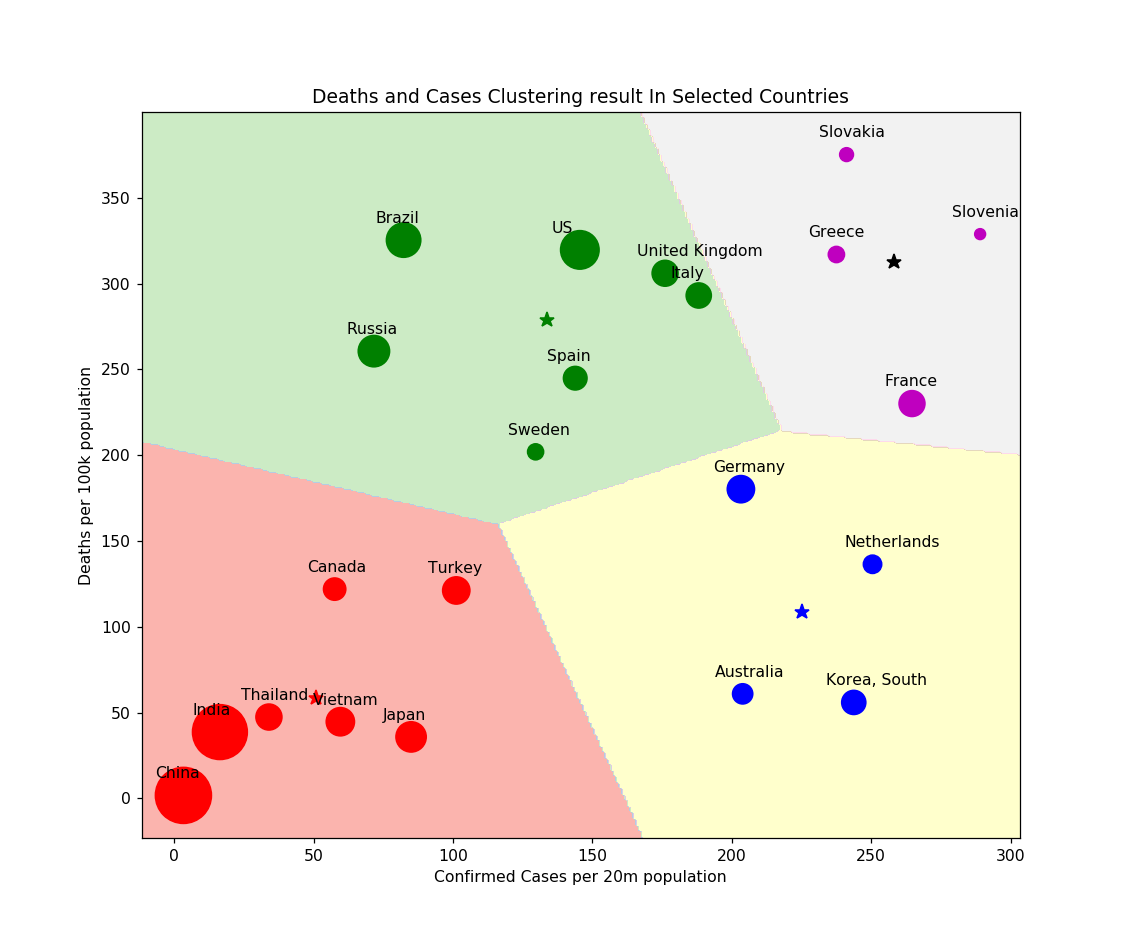

In [135]:
from sklearn.cluster import KMeans

plt.figure()
# 聚类数量
k = 4
# 训练模型
model = KMeans(n_clusters=k)
model.fit(data3)
# 分类中心点坐标
centers = model.cluster_centers_
# 预测结果
result = model.predict(data3)
#print(result)

# 绘制簇的作用域
# 获取数据值所在的范围
x_min, x_max = data3[:, 0].min() - 15, data3[:, 0].max() + 15
y_min, y_max = data3[:, 1].min() - 25, data3[:, 1].max() + 25

# 生成网格矩阵
# print(np.arange(x_min, x_max, 2))
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# z1 = np.zeros((100,len(z)))
# for i in range(0,100):
#     z1[i,:] = z/i
# for j in range(0,100):
#     cs = plt.contourf(xx, yy, z1[j,:]
cs = plt.contourf(xx, yy, z, cmap = plt.cm.Pastel1)
# print(z)

# 用不同的颜色绘制数据点
mark = ['r', 'g', 'b', 'm']
cresult = [[] for i in range(22)]
for i, d in enumerate(data3):
    cresult[i] = mark[result[i]]
plt.scatter(data3[:,0], data3[:,1], s = dia_2/1.5, c = cresult)
plt.title('Deaths and Cases Clustering result In Selected Countries')
plt.xlabel('Confirmed Cases per 20m population')
plt.ylabel('Deaths per 100k population')
# print(country_2)
for i in range(0,N):
    plt.annotate(country_2[i], xy = (data3[i,0], data3[i,1]), xytext = (data3[i,0]-10, data3[i,1]+10), weight = 'light')
# 画出各个分类的中心点
mark = ['*r', '*g', '*b', '*k']
for i, center in enumerate(centers):
    plt.plot(center[0], center[1], mark[i], markersize=10)

plt.show()